# Treinamento do modelo YOLOv8 para reconhecimento de EPIs

Neste documento, foi instalado e configurado as bibliotecas necessárias, preparado um conjunto de dados personalizado através da API do Roboflow e realizado o treinamento e validação do modelo.

O dataset conta com um total de 5731 imagens, sendo 3968 para treino, 1192 para validação e 571 para testes. Avaliando os seguintes EPIs:

- Botas (BOOTS)
- Protetor Auricular (EAR-PROTECTION)
- Óculos de Proteção (GLASSES)
- Luvas (GLOVES)
- Capacete (HARD-HAT)
- Jaqueta (JACKET)
- Camiseta Manga Longa (LONG-SHIRT)
- Calças (PANTS)
- Colete Refletor (REFLECTIVE-VEST)
- Camiseta (SHIRT)
- Pessoa (PERSON)


## Antes de Começar

Vamos garantir que temos acesso à GPU. Podemos usar o comando nvidia-smi para fazer isso. Em caso de qualquer problema, navegue para Editar -> Configurações do notebook -> Acelerador de hardware, defina como GPU, e então clique em Salvar.

In [ ]:
!nvidia-smi

Fri May  3 21:10:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Instalar YOLOv8

Vamos agora instalar o yolo por meio do ultralytics.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 🐍 Python Env

A forma mais simples de utilizar o YOLOv8 é direto em um Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.9MB/s]

100%|██████████| 104k/104k [00:00<00:00, 34.3MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 95.1ms
Speed: 14.3ms preprocess, 95.1ms inference, 652.7ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

Agora vamos importar o dataset do Roboflow.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")

project = rf.workspace("gustavoyolo").project("yolotrainingppe")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to YoloTrainingPPE-2 in yolov8:: 100%|██████████| 11474/11474 [00:02<00:00, 5339.89it/s]


## Treinamento do modelo

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 334MB/s]
New https://pypi.org/project/ultralytics/8.2.8 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/YoloTrainingPPE-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


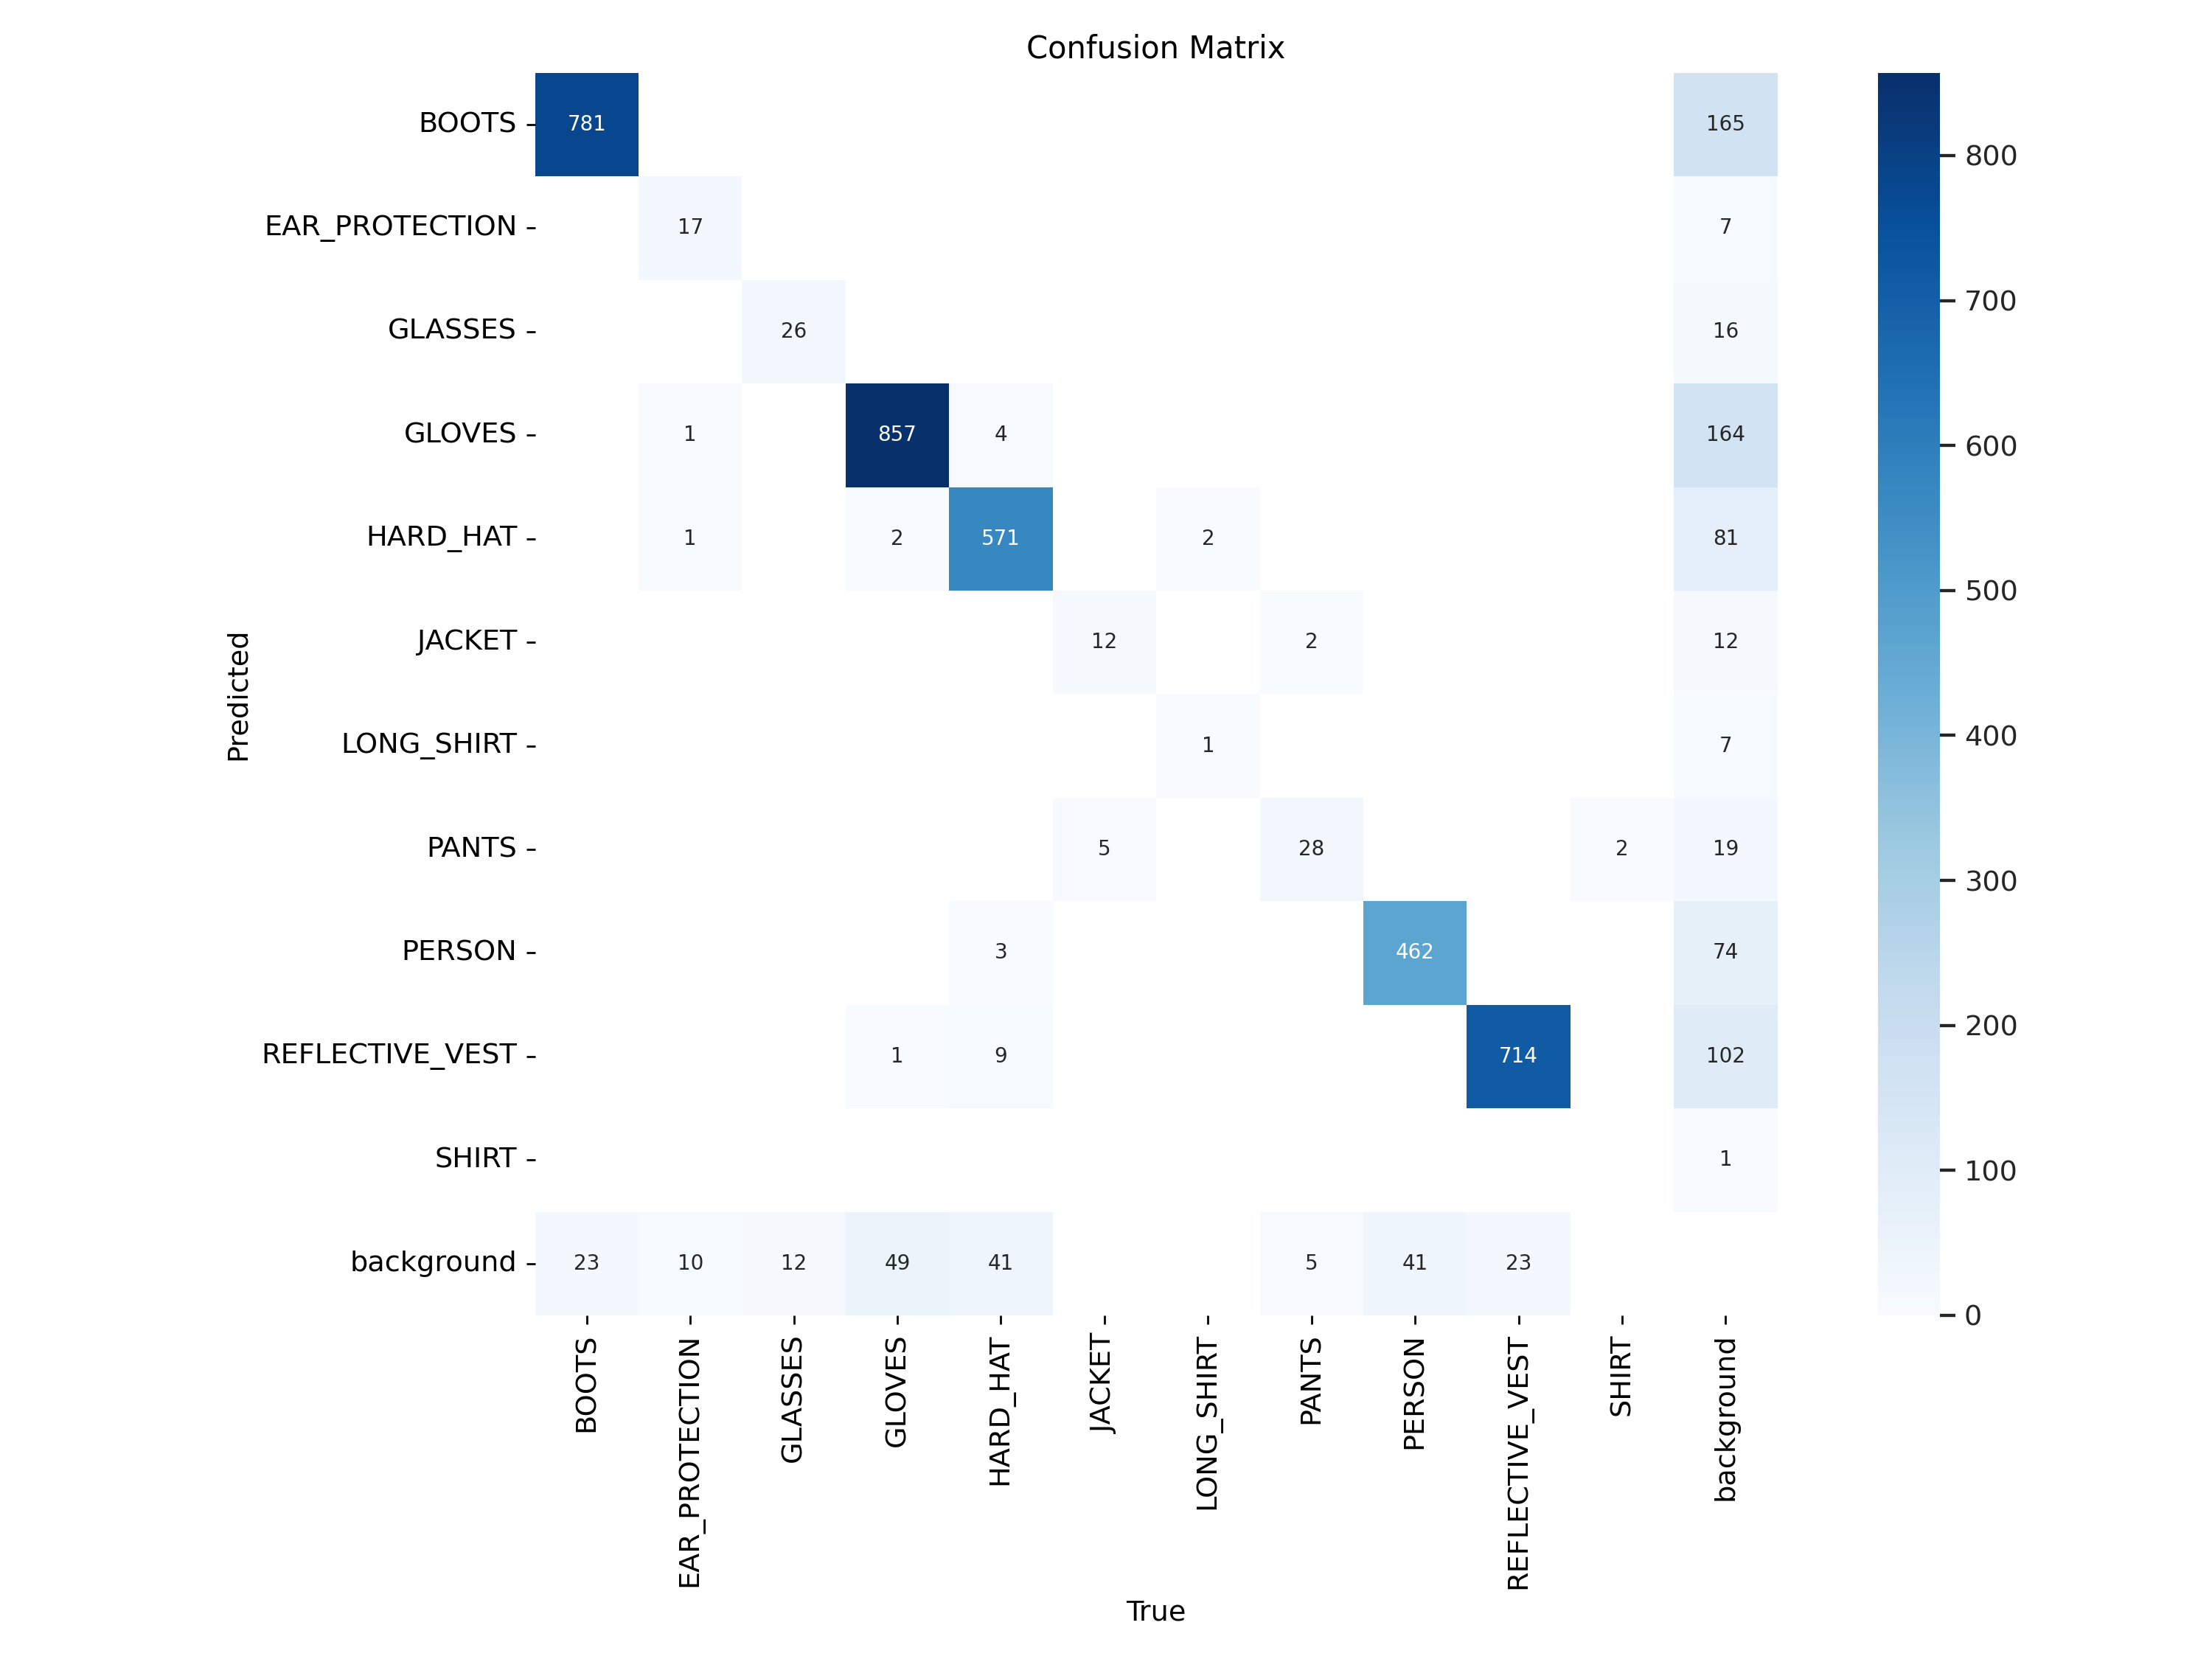

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


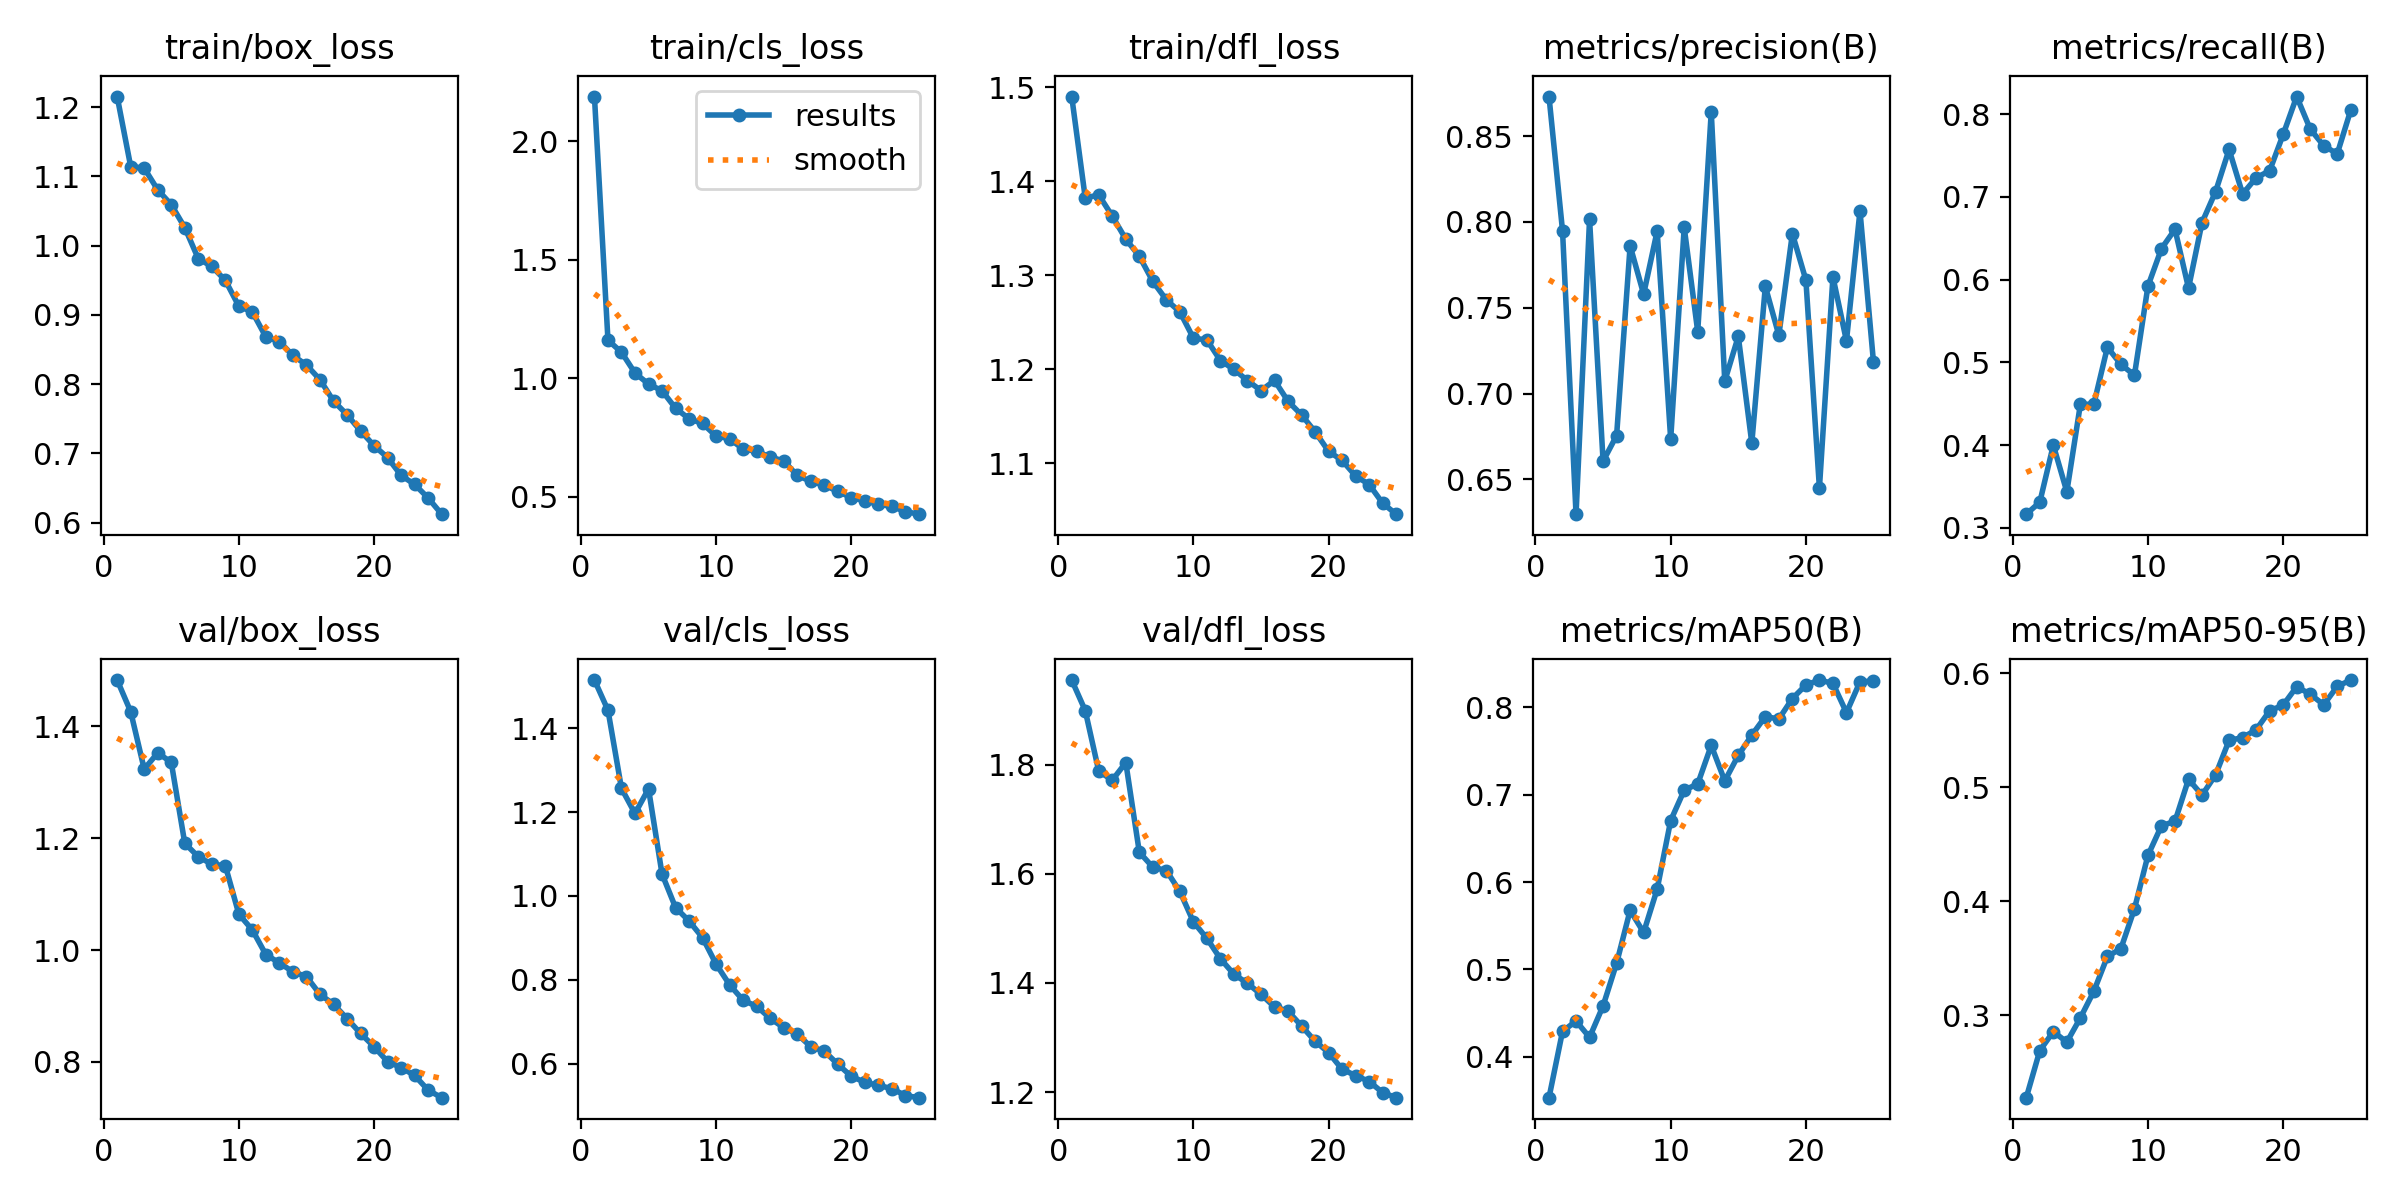

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


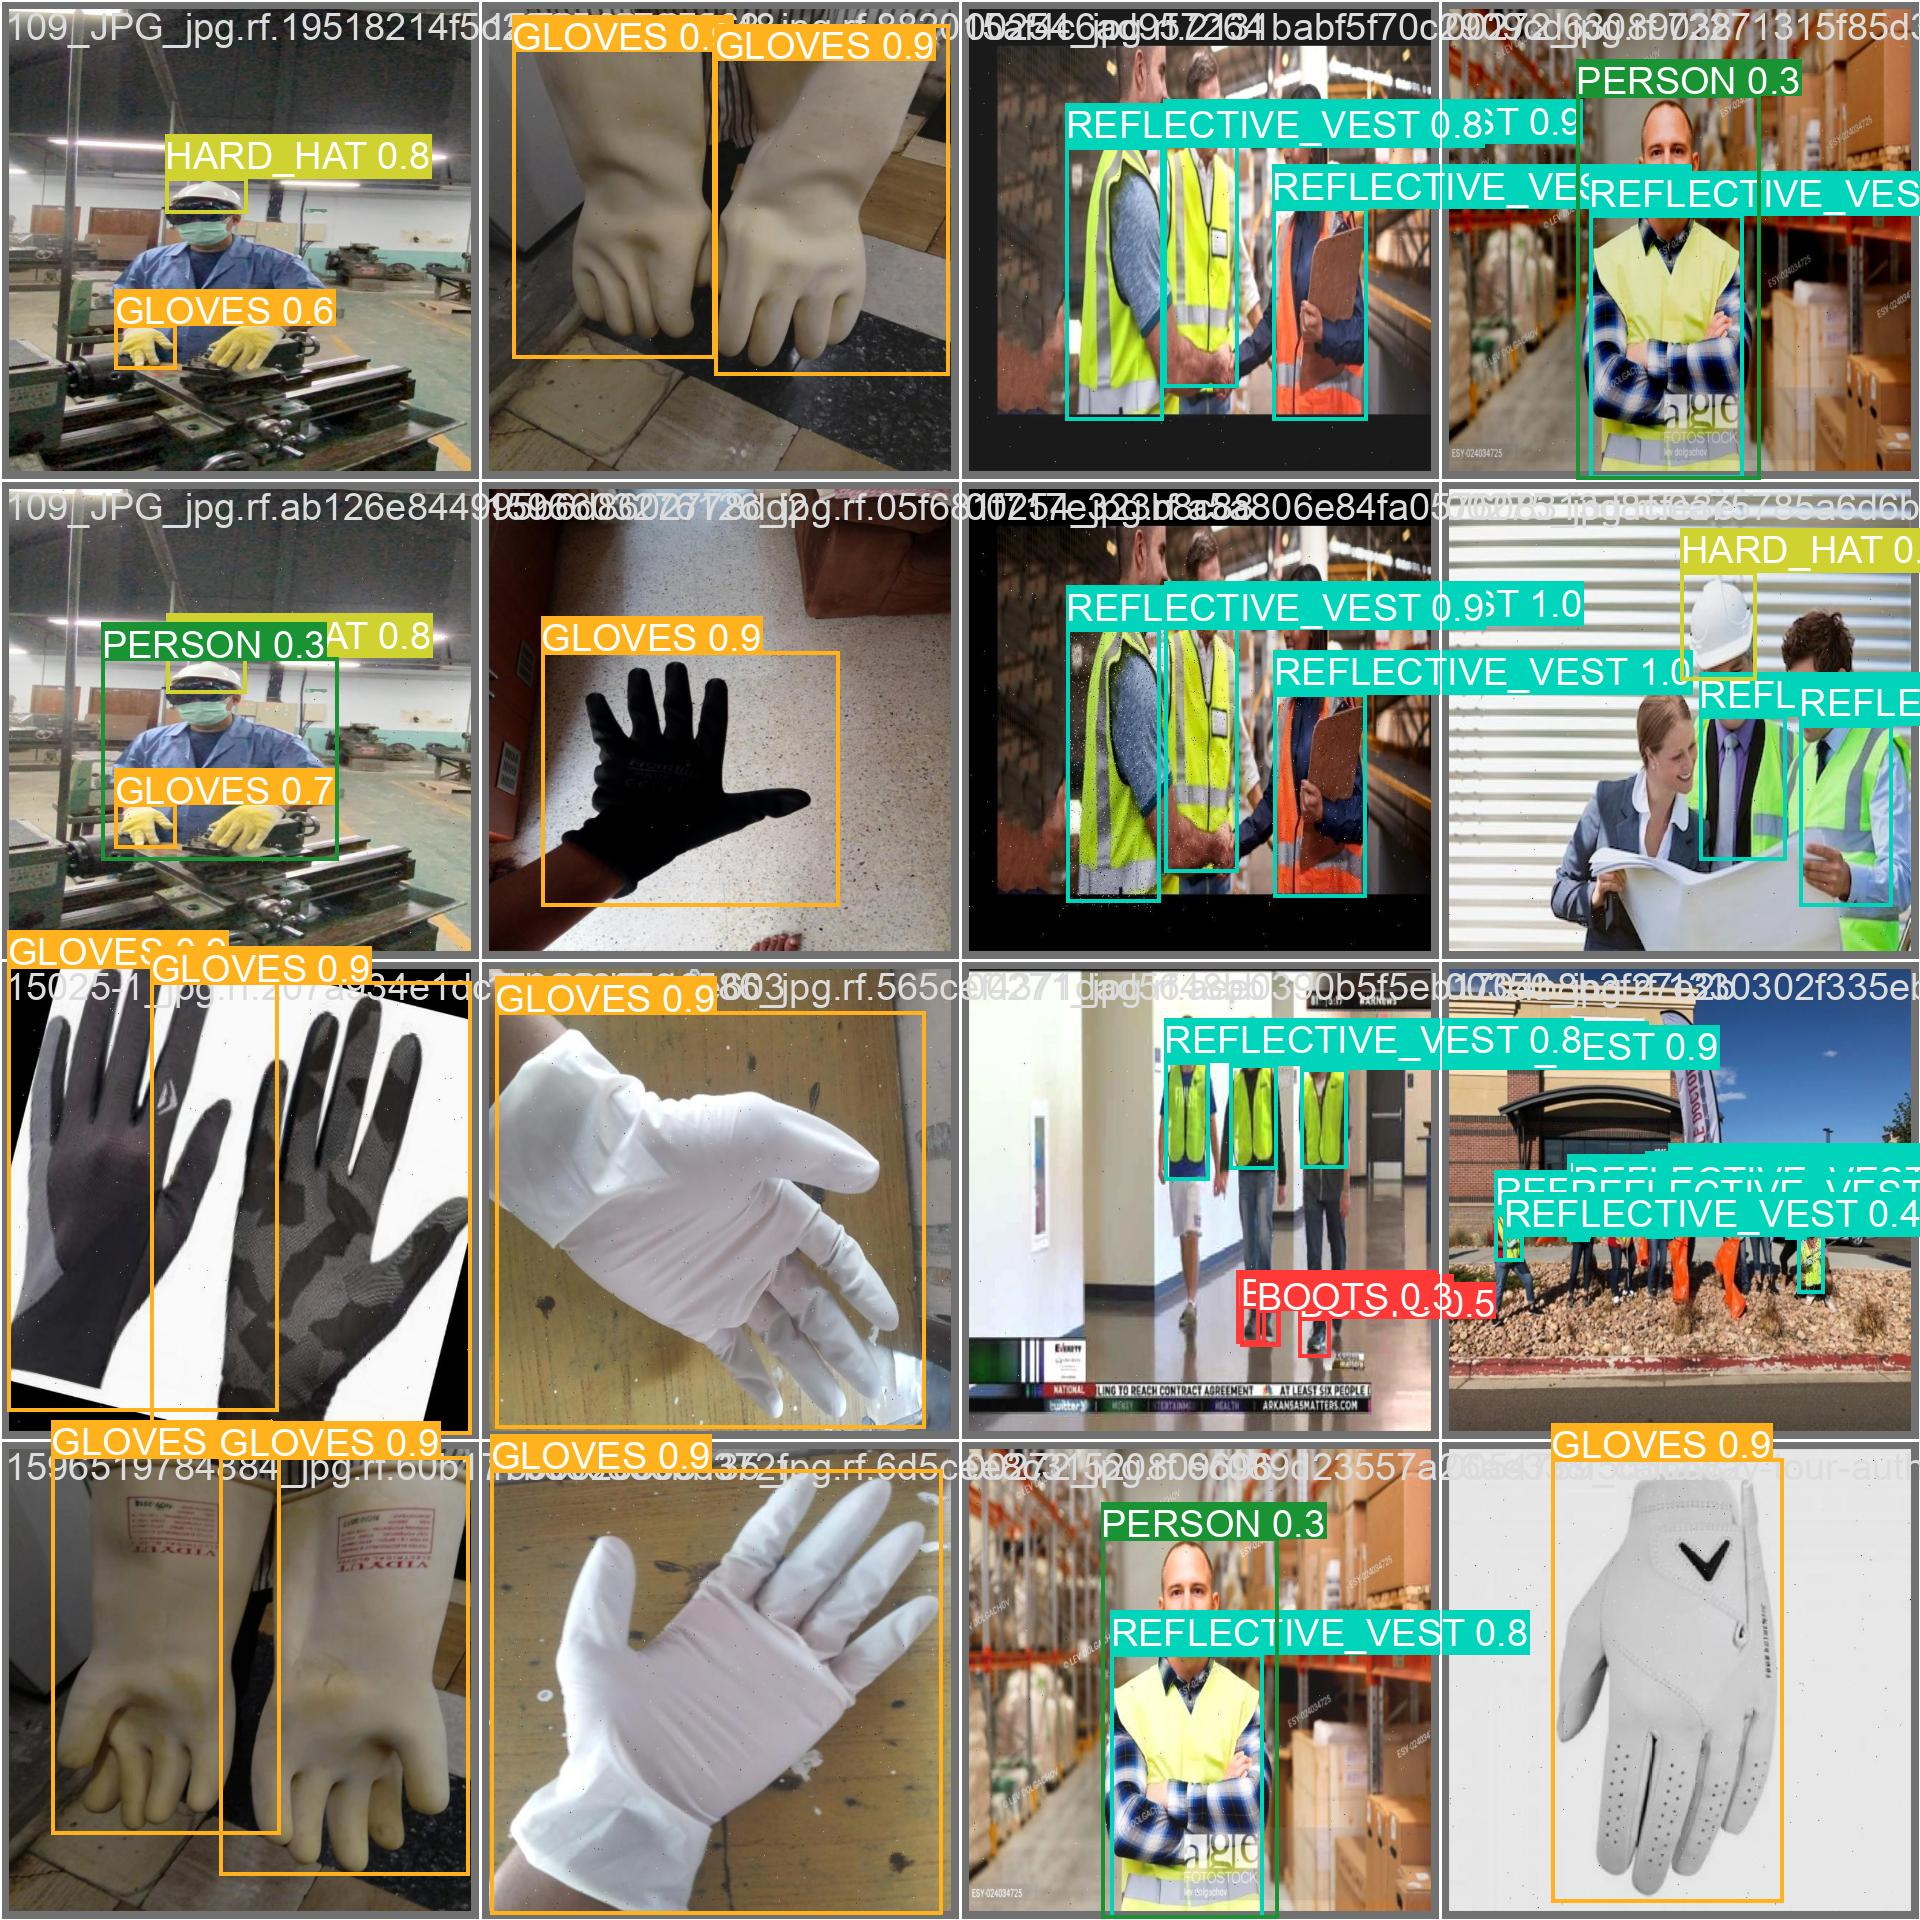

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validar o modelo treinado

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/epp-1502/valid/labels.cache... 1214 images, 0 backgrounds, 0 corrupt: 100% 1214/1214 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 76/76 [00:34<00:00,  2.20it/s]
                   all       1214       3755      0.789      0.743      0.882      0.642
                 BOTAS       1214        813      0.879      0.905      0.965      0.762
                CAMISA       1214          2          1          0      0.995      0.597
    CAMISA_MANGA_LARGA       1214          3      0.309      0.

## Inferencia com o modelo treinado

No comando abaixo pode ser realizadas inferências no modelo treinado, no caso foi utilizado este comando para inferir o resultado do modelo em outras imagens pegadas manualmente para comparação.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130228 parameters, 0 gradients, 28.5 GFLOPs

image 1/582 /content/datasets/epp-1502/test/images/00014_jpg.rf.bcc9bbcdd0b0f579e78a3a59bb4b5b69.jpg: 800x800 1 CASCO, 2 CHALECO_REFLEJANTEs, 1 PERSONA, 22.6ms
image 2/582 /content/datasets/epp-1502/test/images/00087_jpg.rf.63d3731e7447447bc47e934e17a5d227.jpg: 800x800 1 CHALECO_REFLEJANTE, 22.6ms
image 3/582 /content/datasets/epp-1502/test/images/00091_jpg.rf.1ba8a67f778b438eb04ae5c97c13f02b.jpg: 800x800 1 CAMISOLA, 4 CHALECO_REFLEJANTEs, 3 PERSONAs, 22.5ms
image 4/582 /content/datasets/epp-1502/test/images/00091_jpg.rf.87d41b5546d6a63a538d438444ec7d3b.jpg: 800x800 1 BOTAS, 1 CAMISOLA, 4 CHALECO_REFLEJANTEs, 3 PERSONAs, 22.5ms
image 5/582 /content/datasets/epp-1502/test/images/00125_jpg.rf.968579efdcffb752543265f0b56a1193.jpg: 800x800 2 BOTASs, 1 CHALECO_REFLEJANTE, 1 PANTALON, 1 PERSONA, 22.5ms
image 6/582 /

### Fazendo um ZIP do modelo treinado para download

In [ ]:
!zip -r {HOME}/runs/detect/train.zip {HOME}/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/events.out.tfevents.1714770861.66bb1dc4d6e2.1762.0 (deflated 77%)
  adding: content/runs/detect/train/R_curve.png (deflated 5%)
  adding: content/runs/detect/train/train_batch3721.jpg (deflated 4%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 30%)
  adding: content/runs/detect/train/results.png (deflated 7%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 20%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/train/PR_curve.png (deflated 9%)
  adding: content/runs/detect/train/P_curve.png (deflated 6%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 2%)
  adding: content/runs/detect/train/F1_curve.png (deflated 4%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflat